<a href="https://colab.research.google.com/github/Jdasanja/masers_thesis/blob/main/ML_Algo_4_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pandas for reading and displaying local file
import pandas as pd

In [2]:
# Load the dataset from the raw GitHub URL
url = 'https://raw.githubusercontent.com/Jdasanja/masers_thesis/main/processed.cleveland.data'
df = pd.read_csv(url, header=None)

# Add column names (based on standard attribute names for the Cleveland dataset)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'num']

# Add a unique identifier column
df['patient_id'] = range(1, len(df) + 1)

# Set 'patient_id' as the index
df.set_index('patient_id', inplace=True)


# Display first few rows of the uploaded file with headers
print("First few rows of the uploaded file with column headers:")
print(df.head())


First few rows of the uploaded file with column headers:
             age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
patient_id                                                                  
1           63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
2           67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
3           67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
4           37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5           41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

            oldpeak  slope   ca thal  num  
patient_id                                 
1               2.3    3.0  0.0  6.0    0  
2               1.5    2.0  3.0  3.0    2  
3               2.6    2.0  2.0  7.0    1  
4               3.5    3.0  0.0  3.0    0  
5               1.4    1.0  0.0  3.0    0  


In [3]:
# Create a new dataframe with a new binary column based on the values in 'num'
df_binary_col = df.copy()
df_binary_col['num_binary'] = df_binary_col['num'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)

df_binary_col = df_binary_col.drop('num', axis=1)


In [4]:
## Total count of missing values
df_binary_col.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
import numpy as np

## Replace question marks with NaN
df_binary_col.replace('?', np.nan, inplace=True)

## Total count of missing values
df_binary_col.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
## Drop rows with NaN values
df_binary_col.dropna(inplace=True)

## Verify if any null values remain
df_binary_col.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df_binary_col.drop(columns=['num_binary'])

# Separate the target
y = df_binary_col['num_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# Explore the training set
print("DataFrame.info():")
X_train.info()

print("\nDataFrame.describe():")
print(X_train.describe())


DataFrame.info():
<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 56 to 269
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       237 non-null    float64
 1   sex       237 non-null    float64
 2   cp        237 non-null    float64
 3   trestbps  237 non-null    float64
 4   chol      237 non-null    float64
 5   fbs       237 non-null    float64
 6   restecg   237 non-null    float64
 7   thalach   237 non-null    float64
 8   exang     237 non-null    float64
 9   oldpeak   237 non-null    float64
 10  slope     237 non-null    float64
 11  ca        237 non-null    object 
 12  thal      237 non-null    object 
dtypes: float64(11), object(2)
memory usage: 25.9+ KB

DataFrame.describe():
              age         sex          cp    trestbps        chol         fbs  \
count  237.000000  237.000000  237.000000  237.000000  237.000000  237.000000   
mean    54.772152    0.675105    3.185654  132.270042  24

<h1> Transformation Test 1 </h1>
<br>
Logarithmic Transformation of for Resting Blood Pressure and Cholesterol. Squared Transformation of Maximum Heart Rate

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [10]:
# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope']),
        ("onehot", OneHotEncoder(sparse_output=False), ['ca', 'thal'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformedtest = ct.fit_transform(X_train)
X_test_transformedtest = ct.transform(X_test)

<h1>Random Forrest Classifier on Transformation 1</h1>

Accuracy of the model: 0.85
F1 Score of the model: 0.849112925936356
Precision: 0.8560267857142857
Recall: 0.85


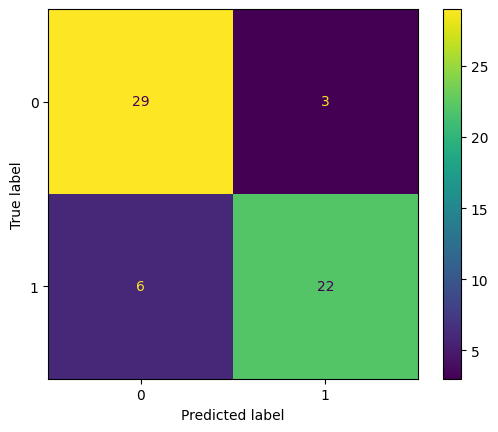

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformedtest, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformedtest)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

<h1>XGB Classifier on Transformation 1</h1>

In [12]:
# Import the necessary library
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_transformedtest, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformedtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



<h1><strong> Transformation Test 2 </strong></h1>
<ol>
<li>Logarithmic Transformation for Resting Blood Pressure and Cholesterol.</li>
<li>Squared Transformation of Maximum Heart Rate</li>
<li> <strong>combination of oldpeak and slope </strong></li> </ol>

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

# Custom Transformer for Combining 'oldpeak' and 'slope'
class CombineOldpeakSlope(BaseEstimator, TransformerMixin):
    def __init__(self, method='add'):  # Choose method: 'add', 'multiply', 'weighted'
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.method == 'add':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] + X_copy['slope']
        elif self.method == 'multiply':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] * X_copy['slope']
        elif self.method == 'weighted':
            X_copy['oldpeak_slope_combined'] = 0.6 * X_copy['oldpeak'] + 0.4 * X_copy['slope']
        return X_copy.drop(columns=['oldpeak', 'slope'])

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']
combine_columns = ['oldpeak', 'slope']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("combine_oldpeak_slope", CombineOldpeakSlope(method='add'), combine_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'fbs', 'restecg', 'exang']),
        ("onehot", OneHotEncoder(sparse_output=False), ['ca', 'thal', 'cp'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

<h2> Random Forrest Classifier on Transformation 2 </h2>

Accuracy of the model: 0.8333333333333334
F1 Score of the model: 0.8327721661054994
Precision: 0.8363095238095238
Recall: 0.8333333333333334


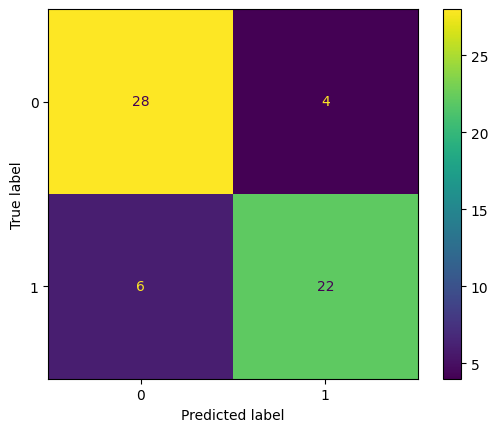

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=1,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

<h2>XGB Forrest Classifier on Transformation 2</h2>

In [15]:
# Import the necessary library
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



<h1> PCA Transformation: </h1>

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca95 = PCA(n_components=0.95)
X_train_pca95 = pca95.fit(X_train_transformed)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(X_train_pca95.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.99999979]


In [18]:
X_train_pca = pca95.fit_transform(X_train_transformed)
X_test_pca = pca95.transform(X_test_transformed)

<h2> Random Forrest Classifier with PCA Transformation </h2>

Accuracy of the model: 0.8
F1 Score of the model: 0.7981900452488688
Precision: 0.8107142857142856
Recall: 0.8


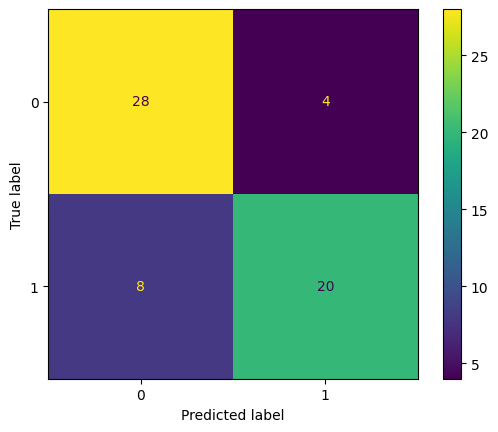

In [28]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=2)

# Training the model on the training dataset
clf.fit(X_train_pca, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_pca)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)
# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

<h1><strong>Tansformation Test 3 </h1></strong>
<br>
<ol>
<li>Logarithmic Transformation for Resting Blood Pressure and Cholesterol.</li>
<li>Squared Transformation of Maximum Heart Rate</li>
<li> combination of oldpeak and slope </li>
<li> <strong>GenderBasedFeatureEngineering: creates new features that capture potential differences between genders (represented by the sex column) in the dataset. It computes gender-normalized features, interaction terms, and gender-specific indicators.</strong></li>
</ol>

In [20]:
# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy


# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy


# Custom Transformer for Combining 'oldpeak' and 'slope'
class CombineOldpeakSlope(BaseEstimator, TransformerMixin):
    def __init__(self, method='add'):  # Choose method: 'add', 'multiply', 'weighted'
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.method == 'add':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] + X_copy['slope']
        elif self.method == 'multiply':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] * X_copy['slope']
        elif self.method == 'weighted':
            X_copy['oldpeak_slope_combined'] = 0.6 * X_copy['oldpeak'] + 0.4 * X_copy['slope']
        return X_copy.drop(columns=['oldpeak', 'slope'])


# Custom Transformer for Gender-Based Feature Engineering
class GenderBasedFeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()

        # Gender-Normalized Features
        X_copy['thalach_norm_gender'] = X_copy['thalach'] / X_copy.groupby('sex')['thalach'].transform('mean')
        X_copy['chol_norm_gender'] = X_copy['chol'] / X_copy.groupby('sex')['chol'].transform('mean')

        # Gender-Interaction Terms
        X_copy['sex_thalach'] = X_copy['sex'] * X_copy['thalach']
        X_copy['sex_oldpeak'] = X_copy['sex'] * X_copy['oldpeak']

        # Gender-Specific Indicators
        X_copy['thalach_above_median_gender'] = (X_copy['thalach'] > X_copy.groupby('sex')['thalach'].transform('median')).astype(int)
        X_copy['chol_above_median_gender'] = (X_copy['chol'] > X_copy.groupby('sex')['chol'].transform('median')).astype(int)

        return X_copy


# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']
combine_columns = ['oldpeak', 'slope']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("combine_oldpeak_slope", CombineOldpeakSlope(method='add'), combine_columns),
        ("gender_features", GenderBasedFeatureEngineering(), list(X_train.columns)),
        ("scaling", StandardScaler(), ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang']),
        ("onehot", OneHotEncoder(sparse_output=False), ['ca', 'thal'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)


<h2> Random Forrest Classifier Transformation 3 </h2>

Accuracy of the model: 0.8333333333333334
F1 Score of the model: 0.8327721661054994
Precision: 0.8363095238095238
Recall: 0.8333333333333334


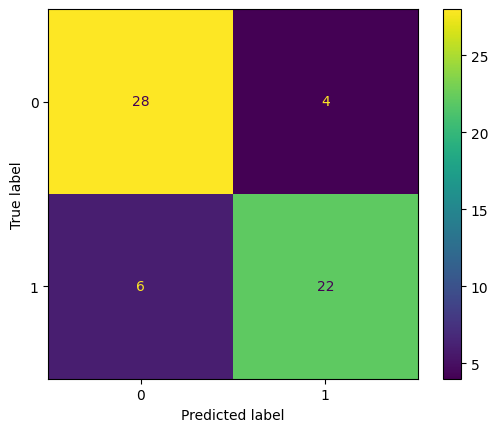

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=42,max_depth=5)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

<h2> Random Forrest Classifier Transformation 3 <strong>Parameter change </strong> </h2>

Accuracy of the model: 0.85
F1 Score of the model: 0.849112925936356
Precision: 0.8560267857142857
Recall: 0.85


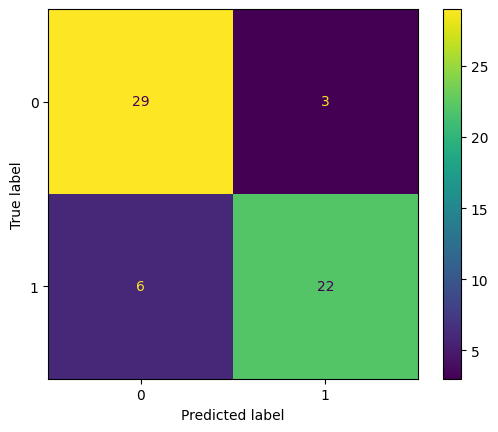

In [22]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=2)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

<h2>Parameter Grid Search for Random Forrest Classifier on Transformation 3 Dataset</h2>

In [23]:
# Create a Random Forest classifier
clf = RandomForestClassifier()

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [2, 3, 5, 10, 20]
}

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted')
}

# Perform grid search with multiple scoring metrics
grid_search_rf = GridSearchCV(
    estimator=clf,
    param_grid=param_grid_rf,
    scoring=scoring,
    refit='f1_weighted',  # Select the best model based on F1-Weighted
    cv=3,
    verbose=1  # To monitor progress
)

# Fit the grid search
grid_search_rf.fit(X_train_transformed, y_train)

# Get the best estimator
best_rf = grid_search_rf.best_estimator_

# Output the best parameters and cross-validated scores
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated F1-Weighted:", grid_search_rf.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Best Cross-Validated F1-Weighted: 0.8261559679119407


<h2> Random Forrest Classifier with <strong>Optimized Parameters</strong> </h2>

Accuracy of the model: 0.8666666666666667
F1 Score of the model: 0.8662177328843995
Precision: 0.8694940476190477
Recall: 0.8666666666666667


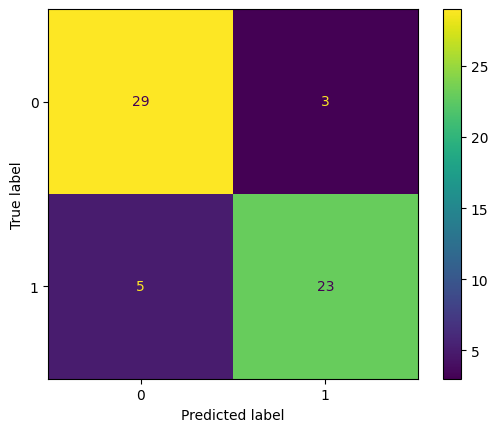

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



In [25]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

print(classification_report(y_test, y_pred))

<h2> XGB Classifier Transformation 3 </h3>

In [26]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model with the PCA-transformed data
xgb_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



<h1> K-Means Crossfold Validation </h1>

<h2> Random Forrest Classifier with <strong> optmized parameters </strong> </h2>

In [30]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)
clf_model = clf.fit(X_train_transformed, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_test}')
print(f'Mean Accuracy: {cross_val_results_test.mean()}')
# Custom scoring functions
precision_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test = cross_val_score(clf_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test}')
print(f'Mean Precision: {precision_test.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test}')
print(f'Mean Recall: {recall_test.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test}')
print(f'Mean F1 Score: {f1_test.mean()}')

Cross-Validation Results (Accuracy): [0.83333333 0.58333333 0.75       0.75       0.91666667]
Mean Accuracy: 0.7666666666666667
Cross-Validation Results (Precision): [0.75       0.5        0.83333333 0.66666667 0.875     ]
Mean Precision: 0.725
Cross-Validation Results (Recall): [0.75       0.2        0.71428571 0.8        1.        ]
Mean Recall: 0.6928571428571428
Cross-Validation Results (F1 Score): [0.75       0.28571429 0.76923077 0.72727273 0.93333333]
Mean F1 Score: 0.6931102231102232


<h2> XGB Boost Classifier with K-means Crossfold Validation</h2>

In [33]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5
xgb_classifier_model = xgb_classifier.fit(X_train_transformed, y_train)
cross_val_results_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results_xgb}')
print(f'Mean Accuracy: {cross_val_results_xgb.mean()}')

# Custom scoring functions
precision_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(precision_score, average='binary'))
recall_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(recall_score, average='binary'))
f1_test_xgb = cross_val_score(xgb_classifier_model, X_test_transformed, y_test, cv=kf, scoring=make_scorer(f1_score, average='binary'))

# Print the results
print(f'Cross-Validation Results (Precision): {precision_test_xgb}')
print(f'Mean Precision: {precision_test_xgb.mean()}')

print(f'Cross-Validation Results (Recall): {recall_test_xgb}')
print(f'Mean Recall: {recall_test_xgb.mean()}')

print(f'Cross-Validation Results (F1 Score): {f1_test_xgb}')
print(f'Mean F1 Score: {f1_test_xgb.mean()}')


Cross-Validation Results (Accuracy): [0.83333333 0.66666667 0.66666667 0.83333333 0.91666667]
Mean Accuracy: 0.7833333333333333
Cross-Validation Results (Precision): [0.75       0.66666667 0.8        0.8        0.875     ]
Mean Precision: 0.7783333333333333
Cross-Validation Results (Recall): [0.75       0.4        0.57142857 0.8        1.        ]
Mean Recall: 0.7042857142857143
Cross-Validation Results (F1 Score): [0.75       0.5        0.66666667 0.8        0.93333333]
Mean F1 Score: 0.7300000000000001


<h1> Male vs. Female test </h1>

In [35]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df_binary_col.drop(columns=['num_binary'])

# Separate the target
y = df_binary_col['num_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# Filter using the original X_test DataFrame to get indices for males and females
male_indices = X_test['sex'] == 1
female_indices = X_test['sex'] == 0

# Use these indices to split the transformed data and y_test
X_test_male = X_test_transformed[male_indices]
y_test_male = y_test[male_indices]

X_test_female = X_test_transformed[female_indices]
y_test_female = y_test[female_indices]

# Verify the splits
print("Male Test Set Shape (X):", X_test_male.shape)
print("Male Test Set Shape (y):", y_test_male.shape)
print("Female Test Set Shape (X):", X_test_female.shape)
print("Female Test Set Shape (y):", y_test_female.shape)


Male Test Set Shape (X): (41, 36)
Male Test Set Shape (y): (41,)
Female Test Set Shape (X): (19, 36)
Female Test Set Shape (y): (19,)


Accuracy of the model: 0.9473684210526315
F1 Score of the model: 0.9502789231142371
Precision: 0.9506578947368421
Recall: 0.9473684210526315


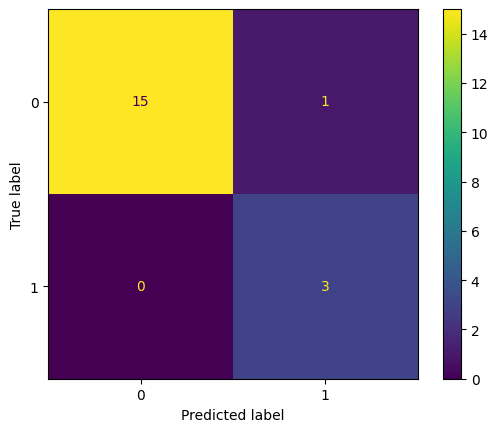

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.75      1.00      0.86         3

    accuracy                           0.95        19
   macro avg       0.88      0.97      0.91        19
weighted avg       0.96      0.95      0.95        19



In [38]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_female)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_female, y_pred)
f1 = f1_score(y_test_female, y_pred, average='weighted')
precision = precision_score(y_pred, y_test_female, average="weighted")
recall = recall_score(y_pred, y_test_female, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test_female, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

print(classification_report(y_test_female, y_pred))

Accuracy of the model: 0.8292682926829268
F1 Score of the model: 0.8311364815775817
Precision: 0.8347560975609757
Recall: 0.8292682926829268


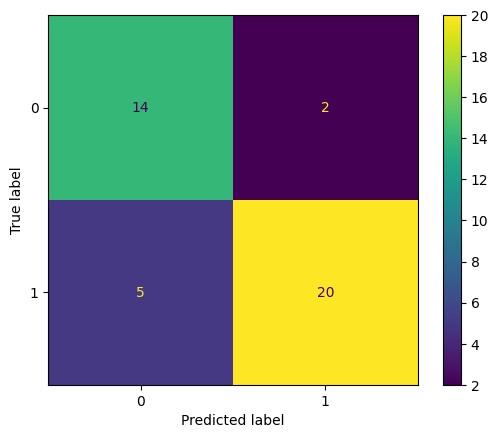

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.91      0.80      0.85        25

    accuracy                           0.83        41
   macro avg       0.82      0.84      0.83        41
weighted avg       0.84      0.83      0.83        41



In [40]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_male)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_male, y_pred)
f1 = f1_score(y_test_male, y_pred, average='weighted')
precision = precision_score(y_pred, y_test_male, average="weighted")
recall = recall_score(y_pred, y_test_male, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test_male, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

print(classification_report(y_test_male, y_pred))